In [1]:
pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install liac-arff

In [3]:
import pandas as pd
import numpy as np
import os

file_df = pd.read_csv('data/data_set_label.csv')

In [4]:
file_df

,No,filename,data_split,Links,main_label,sub_label,Healthy Lifestyle and Weight Loss,Weight Lifting,Running,Yoga,...,Accommodation,Adventure,Culture,Food and drink,duration,frame_count,height,width,fps,count
0,1,Travel_1.mp4,train,https://www.tiktok.com/@travelaholicgf/video/7...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,67.666667,2030,1024,576,30,1
1,2,Travel_2.mp4,test,https://www.tiktok.com/@usfirster/video/731055...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,67.933333,2038,1024,576,30,1
2,2,Travel_2.mp4,validation,https://www.tiktok.com/@usfirster/video/731055...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,67.933333,2038,1024,576,30,1
3,25,Travel_25.mp4,train,https://www.tiktok.com/@guliketravel/video/731...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,174.333333,5230,1024,576,30,1
4,26,Travel_26.mp4,validation,https://www.tiktok.com/@gungangjakpigud/video/...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,118.800000,3564,1024,576,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,296,Sport_296.mp4,train,https://www.tiktok.com/@yoga.waadkian/video/72...,Sport and Fitness,Yoga,0,0,0,1,...,0,0,0,0,207.400000,6222,1024,576,30,1
873,297,Sport_297.mp4,train,https://www.tiktok.com/@yoga.waadkian/video/72...,Sport and Fitness,Yoga,0,0,0,1,...,0,0,0,0,87.966667,2639,1024,576,30,1
874,298,Sport_298.mp4,train,https://www.tiktok.com/@yoga.waadkian/video/72...,Sport and Fitness,Yoga,0,0,0,1,...,0,0,0,0,20.266667,608,1024,576,30,1
875,299,Sport_299.mp4,train,https://www.tiktok.com/@yoga.waadkian/video/72...,Sport and Fitness,Yoga,0,0,0,1,...,0,0,0,0,36.833333,1105,1024,576,30,1


In [5]:
X = file_df.loc[:, ['filename']].to_numpy()
y = file_df.loc[:, ["Healthy Lifestyle and Weight Loss", "Weight Lifting", "Running", "Yoga", "Haircare", "Makeup", "Skincare", "Outfit", "Accommodation", "Adventure", "Culture", "Food and drink"]].to_numpy()


In [6]:
X

array([['Travel_1.mp4'],
       ['Travel_2.mp4'],
       ['Travel_2.mp4'],
       ['Travel_25.mp4'],
       ['Travel_26.mp4'],
       ['Travel_27.mp4'],
       ['Travel_28.mp4'],
       ['Travel_29.mp4'],
       ['Travel_30.mp4'],
       ['Travel_31.mp4'],
       ['Travel_32.mp4'],
       ['Travel_33.mp4'],
       ['Travel_34.mp4'],
       ['Travel_36.mp4'],
       ['Travel_199.mp4'],
       ['Travel_200.mp4'],
       ['Travel_3.mp4'],
       ['Travel_3.mp4'],
       ['Travel_37.mp4'],
       ['Travel_38.mp4'],
       ['Travel_39.mp4'],
       ['Travel_40.mp4'],
       ['Travel_41.mp4'],
       ['Travel_42.mp4'],
       ['Travel_43.mp4'],
       ['Travel_44.mp4'],
       ['Travel_201.mp4'],
       ['Travel_45.mp4'],
       ['Travel_46.mp4'],
       ['Travel_4.mp4'],
       ['Travel_5.mp4'],
       ['Travel_5.mp4'],
       ['Travel_6.mp4'],
       ['Travel_7.mp4'],
       ['Travel_7.mp4'],
       ['Travel_8.mp4'],
       ['Travel_9.mp4'],
       ['Travel_9.mp4'],
       ['Travel_10.mp4'

In [7]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
from skmultilearn.dataset import load_dataset
from skmultilearn.model_selection import iterative_train_test_split

#X, y, _, _ = load_dataset('scene', 'undivided')

X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.1)
X_train, y_train, X_val, y_val = iterative_train_test_split(X, y, test_size=0.1)


In [9]:
X_train

array([['Travel_1.mp4'],
       ['Travel_2.mp4'],
       ['Travel_2.mp4'],
       ['Travel_25.mp4'],
       ['Travel_26.mp4'],
       ['Travel_27.mp4'],
       ['Travel_28.mp4'],
       ['Travel_29.mp4'],
       ['Travel_30.mp4'],
       ['Travel_31.mp4'],
       ['Travel_32.mp4'],
       ['Travel_33.mp4'],
       ['Travel_34.mp4'],
       ['Travel_36.mp4'],
       ['Travel_199.mp4'],
       ['Travel_200.mp4'],
       ['Travel_3.mp4'],
       ['Travel_38.mp4'],
       ['Travel_39.mp4'],
       ['Travel_40.mp4'],
       ['Travel_41.mp4'],
       ['Travel_42.mp4'],
       ['Travel_43.mp4'],
       ['Travel_44.mp4'],
       ['Travel_201.mp4'],
       ['Travel_46.mp4'],
       ['Travel_5.mp4'],
       ['Travel_6.mp4'],
       ['Travel_7.mp4'],
       ['Travel_9.mp4'],
       ['Travel_10.mp4'],
       ['Travel_11.mp4'],
       ['Travel_47.mp4'],
       ['Travel_48.mp4'],
       ['Travel_49.mp4'],
       ['Travel_51.mp4'],
       ['Travel_51.mp4'],
       ['Travel_52.mp4'],
       ['Travel_5

In [10]:
X_test

array([['Travel_1.mp4'],
       ['Travel_3.mp4'],
       ['Travel_37.mp4'],
       ['Travel_45.mp4'],
       ['Travel_4.mp4'],
       ['Travel_5.mp4'],
       ['Travel_7.mp4'],
       ['Travel_8.mp4'],
       ['Travel_9.mp4'],
       ['Travel_11.mp4'],
       ['Travel_12.mp4'],
       ['Travel_47.mp4'],
       ['Travel_49.mp4'],
       ['Travel_50.mp4'],
       ['Travel_134.mp4'],
       ['Travel_24.mp4'],
       ['Travel_136.mp4'],
       ['Travel_15.mp4'],
       ['Travel_14.mp4'],
       ['Travel_17.mp4'],
       ['Travel_18.mp4'],
       ['Travel_146.mp4'],
       ['Travel_21.mp4'],
       ['Travel_23.mp4'],
       ['Beauty_1.mp4'],
       ['Sport_1.mp4'],
       ['Sport_3.mp4'],
       ['Sport_4.mp4'],
       ['Sport_5.mp4'],
       ['Sport_31.mp4'],
       ['Sport_32.mp4'],
       ['Sport_33.mp4'],
       ['Sport_82.mp4'],
       ['Beauty_3.mp4'],
       ['Beauty_4.mp4'],
       ['Beauty_5.mp4'],
       ['Beauty_7.mp4'],
       ['Beauty_8.mp4'],
       ['Beauty_9.mp4'],
       ['

In [11]:
X_val

array([['Travel_3.mp4'],
       ['Travel_37.mp4'],
       ['Travel_45.mp4'],
       ['Travel_4.mp4'],
       ['Travel_5.mp4'],
       ['Travel_7.mp4'],
       ['Travel_8.mp4'],
       ['Travel_9.mp4'],
       ['Travel_11.mp4'],
       ['Travel_12.mp4'],
       ['Travel_47.mp4'],
       ['Travel_49.mp4'],
       ['Travel_50.mp4'],
       ['Travel_134.mp4'],
       ['Travel_24.mp4'],
       ['Travel_136.mp4'],
       ['Travel_15.mp4'],
       ['Travel_14.mp4'],
       ['Travel_17.mp4'],
       ['Travel_18.mp4'],
       ['Travel_146.mp4'],
       ['Travel_21.mp4'],
       ['Travel_23.mp4'],
       ['Beauty_1.mp4'],
       ['Sport_1.mp4'],
       ['Sport_3.mp4'],
       ['Sport_4.mp4'],
       ['Sport_5.mp4'],
       ['Sport_31.mp4'],
       ['Sport_32.mp4'],
       ['Sport_8.mp4'],
       ['Sport_82.mp4'],
       ['Beauty_3.mp4'],
       ['Beauty_4.mp4'],
       ['Beauty_5.mp4'],
       ['Beauty_7.mp4'],
       ['Beauty_8.mp4'],
       ['Beauty_9.mp4'],
       ['Beauty_11.mp4'],
       ['

In [12]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
y_val

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
from collections import Counter

pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=2) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=2) for combination in row),
    'validation' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_val, order=2) for combination in row)
}).T.fillna(0.0)

,"(8, 8)","(8, 9)","(9, 9)","(8, 11)","(11, 11)","(9, 11)","(9, 10)","(10, 11)","(10, 10)","(4, 4)",...,"(0, 1)","(1, 1)","(0, 3)","(3, 3)","(5, 5)","(6, 6)","(5, 6)","(7, 7)","(5, 7)","(1, 2)"
train,32.0,15.0,170.0,7.0,57.0,29.0,47.0,17.0,53.0,8.0,...,13.0,88.0,5.0,72.0,120.0,66.0,2.0,89.0,1.0,1.0
test,4.0,2.0,19.0,1.0,6.0,3.0,5.0,1.0,6.0,1.0,...,1.0,10.0,0.0,8.0,13.0,7.0,0.0,10.0,0.0,0.0
validation,3.0,2.0,19.0,1.0,6.0,3.0,5.0,1.0,6.0,1.0,...,2.0,10.0,0.0,8.0,13.0,7.0,0.0,10.0,0.0,0.0


In [16]:
X_train.shape[0], X_test.shape[0], X_val.shape[0]

(791, 88, 86)

In [17]:
y_train.shape[0], y_test.shape[0], y_val.shape[0]

(791, 88, 86)

In [18]:
#Define Column name
train_column = ["filename"]

# Create a DataFrame
train_df = pd.DataFrame(X_train, columns = train_column)

# Display the DataFrame
print(train_df)

          filename
0     Travel_1.mp4
1     Travel_2.mp4
2     Travel_2.mp4
3    Travel_25.mp4
4    Travel_26.mp4
..             ...
786  Sport_296.mp4
787  Sport_297.mp4
788  Sport_298.mp4
789  Sport_299.mp4
790  Sport_300.mp4

[791 rows x 1 columns]


In [19]:
# Add a new column with the same length as the DataFrame
train_df["data_split"] = ["train"] * len(train_df)

# Display the DataFrame with the new column
print(train_df)

          filename data_split
0     Travel_1.mp4      train
1     Travel_2.mp4      train
2     Travel_2.mp4      train
3    Travel_25.mp4      train
4    Travel_26.mp4      train
..             ...        ...
786  Sport_296.mp4      train
787  Sport_297.mp4      train
788  Sport_298.mp4      train
789  Sport_299.mp4      train
790  Sport_300.mp4      train

[791 rows x 2 columns]


In [20]:
#Define Column name
test_column = ["filename"]

# Create a DataFrame
test_df = pd.DataFrame(X_test, columns = test_column)

# Display the DataFrame
print(test_df)

         filename
0    Travel_1.mp4
1    Travel_3.mp4
2   Travel_37.mp4
3   Travel_45.mp4
4    Travel_4.mp4
..            ...
83   Sport_27.mp4
84   Sport_28.mp4
85   Sport_30.mp4
86  Sport_220.mp4
87  Sport_221.mp4

[88 rows x 1 columns]


In [21]:
# Add a new column with the same length as the DataFrame
test_df["data_split"] = ["test"] * len(test_df)

# Display the DataFrame with the new column
print(test_df)

         filename data_split
0    Travel_1.mp4       test
1    Travel_3.mp4       test
2   Travel_37.mp4       test
3   Travel_45.mp4       test
4    Travel_4.mp4       test
..            ...        ...
83   Sport_27.mp4       test
84   Sport_28.mp4       test
85   Sport_30.mp4       test
86  Sport_220.mp4       test
87  Sport_221.mp4       test

[88 rows x 2 columns]


In [22]:
#Define Column name
val_column = ["filename"]

# Create a DataFrame
val_df = pd.DataFrame(X_val, columns = test_column)

# Display the DataFrame
print(val_df)

         filename
0    Travel_3.mp4
1   Travel_37.mp4
2   Travel_45.mp4
3    Travel_4.mp4
4    Travel_5.mp4
..            ...
81   Sport_28.mp4
82   Sport_29.mp4
83   Sport_30.mp4
84  Sport_220.mp4
85  Sport_221.mp4

[86 rows x 1 columns]


In [23]:
# Add a new column with the same length as the DataFrame
val_df["data_split"] = ["validation"] * len(val_df)

# Display the DataFrame with the new column
print(val_df)

         filename  data_split
0    Travel_3.mp4  validation
1   Travel_37.mp4  validation
2   Travel_45.mp4  validation
3    Travel_4.mp4  validation
4    Travel_5.mp4  validation
..            ...         ...
81   Sport_28.mp4  validation
82   Sport_29.mp4  validation
83   Sport_30.mp4  validation
84  Sport_220.mp4  validation
85  Sport_221.mp4  validation

[86 rows x 2 columns]


In [24]:
concat_df = pd.concat([train_df, test_df, val_df], axis=0)

# Display the concatenated DataFrame along columns
print(concat_df)

         filename  data_split
0    Travel_1.mp4       train
1    Travel_2.mp4       train
2    Travel_2.mp4       train
3   Travel_25.mp4       train
4   Travel_26.mp4       train
..            ...         ...
81   Sport_28.mp4  validation
82   Sport_29.mp4  validation
83   Sport_30.mp4  validation
84  Sport_220.mp4  validation
85  Sport_221.mp4  validation

[965 rows x 2 columns]


In [25]:
# Inner join
join_df = pd.merge(file_df, concat_df, on = "filename")
print(join_df)

       No       filename data_split_x  \
0       1   Travel_1.mp4        train   
1       1   Travel_1.mp4        train   
2       2   Travel_2.mp4         test   
3       2   Travel_2.mp4         test   
4       2   Travel_2.mp4   validation   
...   ...            ...          ...   
1180  296  Sport_296.mp4        train   
1181  297  Sport_297.mp4        train   
1182  298  Sport_298.mp4        train   
1183  299  Sport_299.mp4        train   
1184  300  Sport_300.mp4        train   

                                                  Links         main_label  \
0     https://www.tiktok.com/@travelaholicgf/video/7...             Travel   
1     https://www.tiktok.com/@travelaholicgf/video/7...             Travel   
2     https://www.tiktok.com/@usfirster/video/731055...             Travel   
3     https://www.tiktok.com/@usfirster/video/731055...             Travel   
4     https://www.tiktok.com/@usfirster/video/731055...             Travel   
...                                    

In [26]:
# Specify the file path where you want to save the CSV file
#csv_file_path = 'data/data_set_label.csv'

# Export the DataFrame to a CSV file
#join_df.to_csv(csv_file_path, index=False)

#print(f'DataFrame exported to CSV file: {csv_file_path}')

EDA Part

In [27]:
train_count = concat_df['data_split'].value_counts().get('train', 0)
test_count = concat_df['data_split'].value_counts().get('test', 0)
val_count = concat_df['data_split'].value_counts().get('validation', 0)

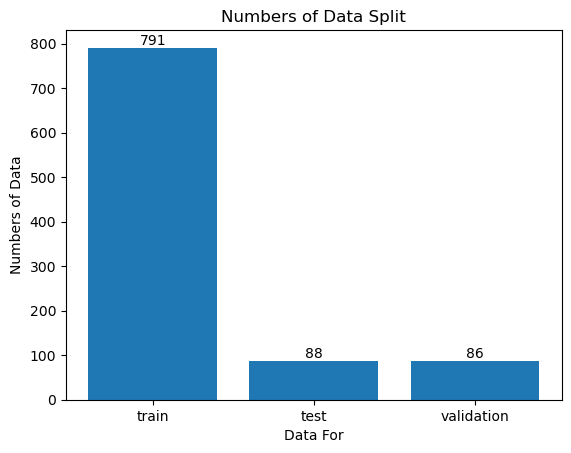

In [28]:
import matplotlib.pyplot as plt

# Create a sample DataFrame
data_data = {'data_for': ['train', 'test', 'validation'],
        'value': [train_count, test_count, val_count]}

data_df = pd.DataFrame(data_data)

# Plot a bar chart
plt.bar(data_df['data_for'], data_df['value'])

# Add labels and title
plt.xlabel('Data For')
plt.ylabel('Numbers of Data')
plt.title('Numbers of Data Split')

for i, value in enumerate(data_df['value']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')
    
# Show the plot
plt.show()

In [29]:
print(file_df)

      No       filename  data_split  \
0      1   Travel_1.mp4       train   
1      2   Travel_2.mp4        test   
2      2   Travel_2.mp4  validation   
3     25  Travel_25.mp4       train   
4     26  Travel_26.mp4  validation   
..   ...            ...         ...   
872  296  Sport_296.mp4       train   
873  297  Sport_297.mp4       train   
874  298  Sport_298.mp4       train   
875  299  Sport_299.mp4       train   
876  300  Sport_300.mp4       train   

                                                 Links         main_label  \
0    https://www.tiktok.com/@travelaholicgf/video/7...             Travel   
1    https://www.tiktok.com/@usfirster/video/731055...             Travel   
2    https://www.tiktok.com/@usfirster/video/731055...             Travel   
3    https://www.tiktok.com/@guliketravel/video/731...             Travel   
4    https://www.tiktok.com/@gungangjakpigud/video/...             Travel   
..                                                 ...               

In [30]:
columns_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
eda_sub_df = file_df.drop(columns=columns_to_drop)

print(eda_sub_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                    0               0        0     0   
1                                    0               0        0     0   
2                                    0               0        0     0   
3                                    0               0        0     0   
4                                    0               0        0     0   
..                                 ...             ...      ...   ...   
872                                  0               0        0     1   
873                                  0               0        0     1   
874                                  0               0        0     1   
875                                  0               0        0     1   
876                                  0               0        0     1   

     Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0           0       0         0       0      

In [31]:
# Sum the occurrences of 1 in each column
sub_column_sums =eda_sub_df.sum(axis=0)
print(sub_column_sums)


Healthy Lifestyle and Weight Loss      84
Weight Lifting                         98
Running                                84
Yoga                                   80
Haircare                                9
Makeup                                133
Skincare                               73
Outfit                                 99
Accommodation                          35
Adventure                             189
Culture                                59
Food and drink                         63
count                                1006
dtype: int64


In [32]:
# Create a new DataFrame from the result
result_sub_df = pd.DataFrame({'Sub Label Name': sub_column_sums.index, 'Counts': sub_column_sums.values})
print(result_sub_df)

                       Sub Label Name  Counts
0   Healthy Lifestyle and Weight Loss      84
1                      Weight Lifting      98
2                             Running      84
3                                Yoga      80
4                            Haircare       9
5                              Makeup     133
6                            Skincare      73
7                              Outfit      99
8                       Accommodation      35
9                           Adventure     189
10                            Culture      59
11                     Food and drink      63
12                              count    1006


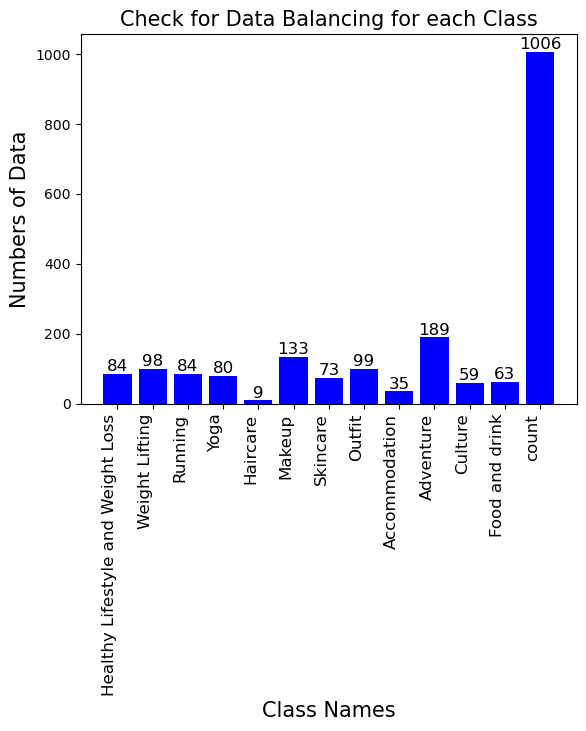

In [33]:
# Plot a bar chart
plt.bar(result_sub_df['Sub Label Name'], result_sub_df['Counts'], color = 'blue')

# Add labels and title
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Numbers of Data', fontsize = 15)
plt.title('Check for Data Balancing for each Class', fontsize = 15)
plt.xticks(rotation=90, ha='right', fontsize = 12)

# Annotate each bar with its corresponding value
for i, value in enumerate(result_sub_df['Counts']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize = 12)
    
# Show the plot
plt.show()

In [34]:
print(file_df)

      No       filename  data_split  \
0      1   Travel_1.mp4       train   
1      2   Travel_2.mp4        test   
2      2   Travel_2.mp4  validation   
3     25  Travel_25.mp4       train   
4     26  Travel_26.mp4  validation   
..   ...            ...         ...   
872  296  Sport_296.mp4       train   
873  297  Sport_297.mp4       train   
874  298  Sport_298.mp4       train   
875  299  Sport_299.mp4       train   
876  300  Sport_300.mp4       train   

                                                 Links         main_label  \
0    https://www.tiktok.com/@travelaholicgf/video/7...             Travel   
1    https://www.tiktok.com/@usfirster/video/731055...             Travel   
2    https://www.tiktok.com/@usfirster/video/731055...             Travel   
3    https://www.tiktok.com/@guliketravel/video/731...             Travel   
4    https://www.tiktok.com/@gungangjakpigud/video/...             Travel   
..                                                 ...               

In [35]:
# Extract the 'duration' column
duration_column = file_df['duration']

# Calculate max, min, mean, and standard deviation
max_duration = duration_column.max()
min_duration = duration_column.min()
mean_duration = duration_column.mean()
std_dev_duration = duration_column.std()

# Print the results
print(f'Max Duration: {max_duration:.1f}', 'mins')
print(f'Min Duration: {min_duration:.1f}', 'mins')
print(f'Mean Duration: {mean_duration:.1f}', 'mins')
print(f'Standard Deviation Duration: {std_dev_duration:.1f}', 'mins')

Max Duration: 600.0 mins
Min Duration: 5.6 mins
Mean Duration: 64.6 mins
Standard Deviation Duration: 66.6 mins


Text(0.5, 1.0, 'Distribution of Duration (mins)')

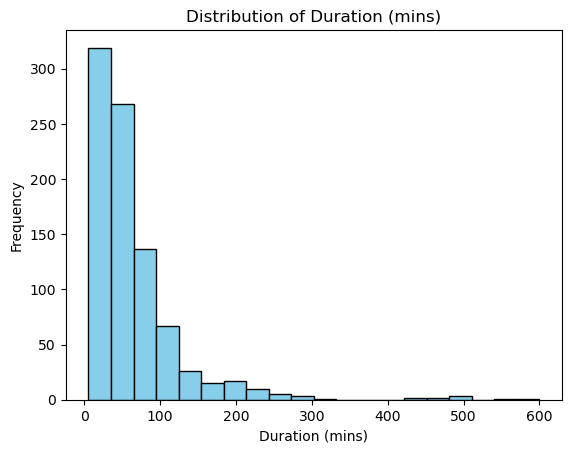

In [36]:
# Plot histogram
plt.hist(duration_column, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Duration (mins)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration (mins)')

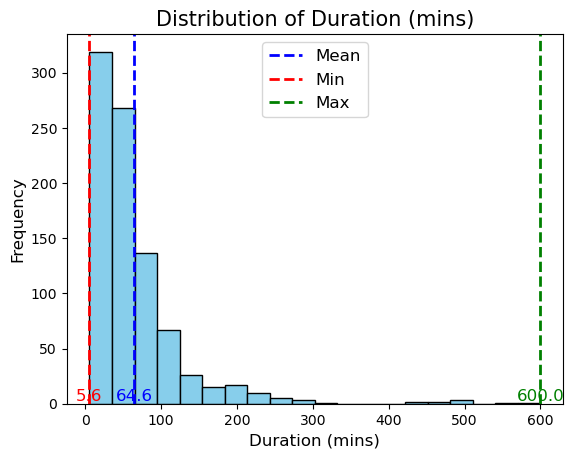

In [37]:
# Plot histogram
plt.hist(duration_column, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Duration (mins)', fontsize =12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Distribution of Duration (mins)', fontsize = 15)

# Add vertical lines for mean and standard deviation
plt.axvline(mean_duration, color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(min_duration, color='red', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(max_duration, color='green', linestyle='dashed', linewidth=2, label='Max')

plt.legend(loc='upper center', fontsize = 12)

# Add labels for min, max, mean, and sd
plt.text(min_duration, 0, f'{min_duration:.1f}', rotation=0, va='bottom', ha = 'center', fontsize = 12, color = 'red')
plt.text(max_duration, 0, f'{max_duration:.1f}', rotation=0, va='bottom', ha='center', fontsize = 12, color = 'green')
plt.text(mean_duration, 0, f'{mean_duration:.1f}', rotation=0, va='bottom', ha='center', fontsize = 12, color = 'blue')

# Show the plot
plt.show()

In [38]:
train_label = pd.read_csv('data/train_label.csv')
test_label = pd.read_csv('data/test_label.csv')
val_label = pd.read_csv('data/validate_label.csv')

In [39]:
train_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
train_sub_df = train_label.drop(columns=train_to_drop)

print(train_sub_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                    0               0        0     0   
1                                    0               0        0     0   
2                                    0               0        0     0   
3                                    0               0        0     0   
4                                    0               0        0     0   
..                                 ...             ...      ...   ...   
710                                  0               0        0     1   
711                                  0               0        0     1   
712                                  0               0        0     1   
713                                  0               0        0     1   
714                                  0               0        0     1   

     Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0           0       0         0       0      

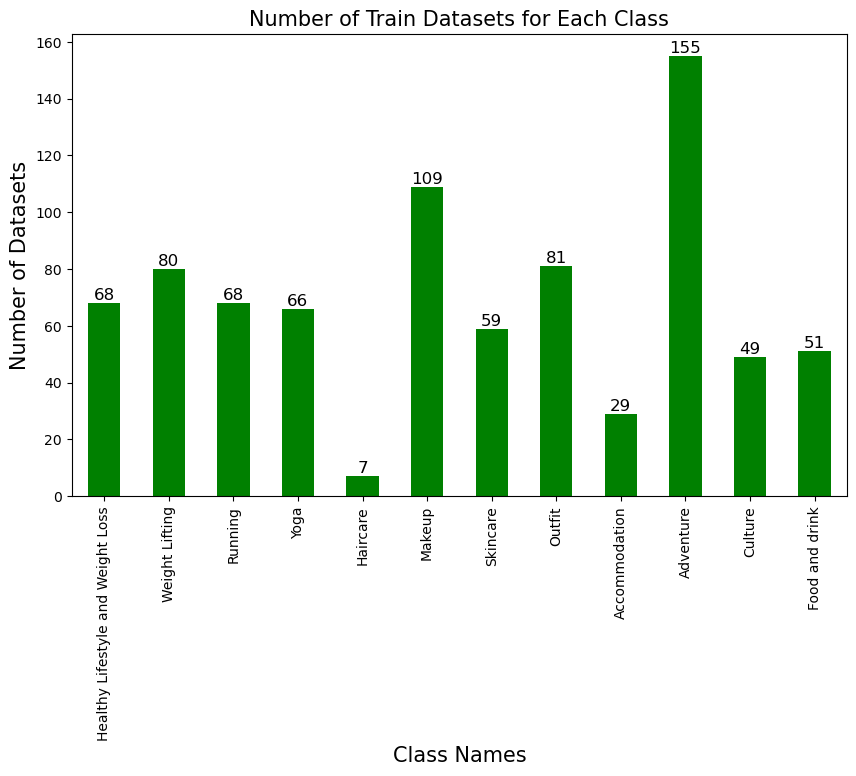

In [40]:
# Count the number of 1s for each column
count_series_train = train_sub_df.sum()

# Plot the bar chart
count_series_train.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Number of Train Datasets for Each Class', fontsize = 15)
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Number of Datasets', fontsize = 15)

for i, v in enumerate(count_series_train):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize = 12)

plt.show()

In [41]:
test_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
test_sub_df = test_label.drop(columns=test_to_drop)

print(test_sub_df)

    Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                   0               0        0     0   
1                                   0               0        0     0   
2                                   0               0        0     0   
3                                   0               0        0     0   
4                                   0               0        0     0   
..                                ...             ...      ...   ...   
76                                  0               1        0     0   
77                                  0               0        0     1   
78                                  0               0        0     1   
79                                  0               0        0     1   
80                                  0               0        0     1   

    Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0          0       0         0       0              1     

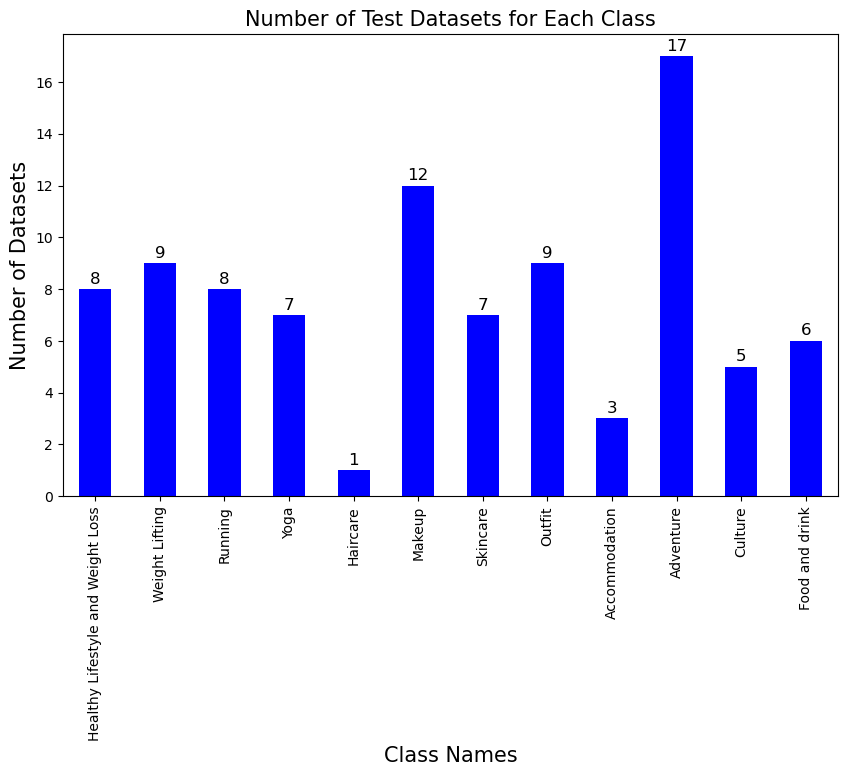

In [42]:
# Count the number of 1s for each column
count_series_test = test_sub_df.sum()

# Plot the bar chart
count_series_test.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Number of Test Datasets for Each Class', fontsize = 15)
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Number of Datasets', fontsize = 15)

for i, v in enumerate(count_series_test):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize = 12)

plt.show()

In [43]:
val_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'duration', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
val_sub_df = val_label.drop(columns=test_to_drop)

print(val_sub_df)

    Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                   0               0        0     0   
1                                   0               0        0     0   
2                                   0               0        0     0   
3                                   0               0        0     0   
4                                   0               0        0     0   
..                                ...             ...      ...   ...   
76                                  0               1        0     0   
77                                  0               1        0     0   
78                                  0               0        0     1   
79                                  0               0        0     1   
80                                  0               0        0     1   

    Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0          0       0         0       0              1     

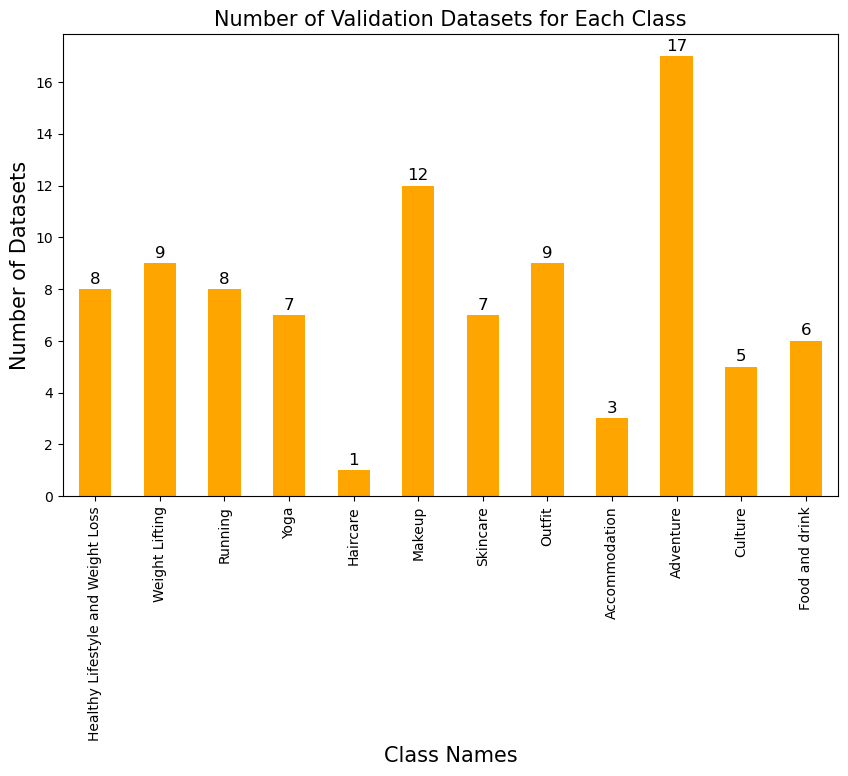

In [44]:
# Count the number of 1s for each column
count_series_val = val_sub_df.sum()

# Plot the bar chart
count_series_val.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Validation Datasets for Each Class', fontsize = 15)
plt.xlabel('Class Names', fontsize = 15)
plt.ylabel('Number of Datasets', fontsize = 15)

for i, v in enumerate(count_series_val):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

In [45]:
train_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

#Drop the specified columns
train_dur_df = train_label.drop(columns=train_to_drop)

print(train_dur_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                    0               0        0     0   
1                                    0               0        0     0   
2                                    0               0        0     0   
3                                    0               0        0     0   
4                                    0               0        0     0   
..                                 ...             ...      ...   ...   
710                                  0               0        0     1   
711                                  0               0        0     1   
712                                  0               0        0     1   
713                                  0               0        0     1   
714                                  0               0        0     1   

     Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0           0       0         0       0      

In [46]:
test_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
test_dur_df = test_label.drop(columns=test_to_drop)

print(test_dur_df)

    Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                   0               0        0     0   
1                                   0               0        0     0   
2                                   0               0        0     0   
3                                   0               0        0     0   
4                                   0               0        0     0   
..                                ...             ...      ...   ...   
76                                  0               1        0     0   
77                                  0               0        0     1   
78                                  0               0        0     1   
79                                  0               0        0     1   
80                                  0               0        0     1   

    Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0          0       0         0       0              1     

In [47]:
val_to_drop = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
val_dur_df = val_label.drop(columns=val_to_drop)

print(val_dur_df)

    Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                   0               0        0     0   
1                                   0               0        0     0   
2                                   0               0        0     0   
3                                   0               0        0     0   
4                                   0               0        0     0   
..                                ...             ...      ...   ...   
76                                  0               1        0     0   
77                                  0               1        0     0   
78                                  0               0        0     1   
79                                  0               0        0     1   
80                                  0               0        0     1   

    Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0          0       0         0       0              1     

In [48]:
columns_to_drop2 = ['No', 'filename', 'Links', 'main_label', 'sub_label', 'frame_count', 'height', 'width', 'fps', 'data_split']

# Drop the specified columns
eda_dur_df = file_df.drop(columns=columns_to_drop2)

print(eda_dur_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running  Yoga  \
0                                    0               0        0     0   
1                                    0               0        0     0   
2                                    0               0        0     0   
3                                    0               0        0     0   
4                                    0               0        0     0   
..                                 ...             ...      ...   ...   
872                                  0               0        0     1   
873                                  0               0        0     1   
874                                  0               0        0     1   
875                                  0               0        0     1   
876                                  0               0        0     1   

     Haircare  Makeup  Skincare  Outfit  Accommodation  Adventure  Culture  \
0           0       0         0       0      

In [49]:
# Create a new DataFrame with the product of 'duration' and each of the other 12 columns
product_df = eda_dur_df.copy()  # Copy the original DataFrame

# Multiply each column (except 'duration') by the 'duration'
for col in eda_dur_df.columns[:-1]:  # Exclude the last column 'duration'
    product_df[col] = product_df[col] * product_df['duration']

# Drop the 'duration' column as it's no longer needed
product_df = product_df.drop(columns=['duration'])

# Print the new DataFrame
print(product_df)

     Healthy Lifestyle and Weight Loss  Weight Lifting  Running        Yoga  \
0                                  0.0             0.0      0.0    0.000000   
1                                  0.0             0.0      0.0    0.000000   
2                                  0.0             0.0      0.0    0.000000   
3                                  0.0             0.0      0.0    0.000000   
4                                  0.0             0.0      0.0    0.000000   
..                                 ...             ...      ...         ...   
872                                0.0             0.0      0.0  207.400000   
873                                0.0             0.0      0.0   87.966667   
874                                0.0             0.0      0.0   20.266667   
875                                0.0             0.0      0.0   36.833333   
876                                0.0             0.0      0.0   73.933333   

     Haircare  Makeup  Skincare  Outfit  Accommodat

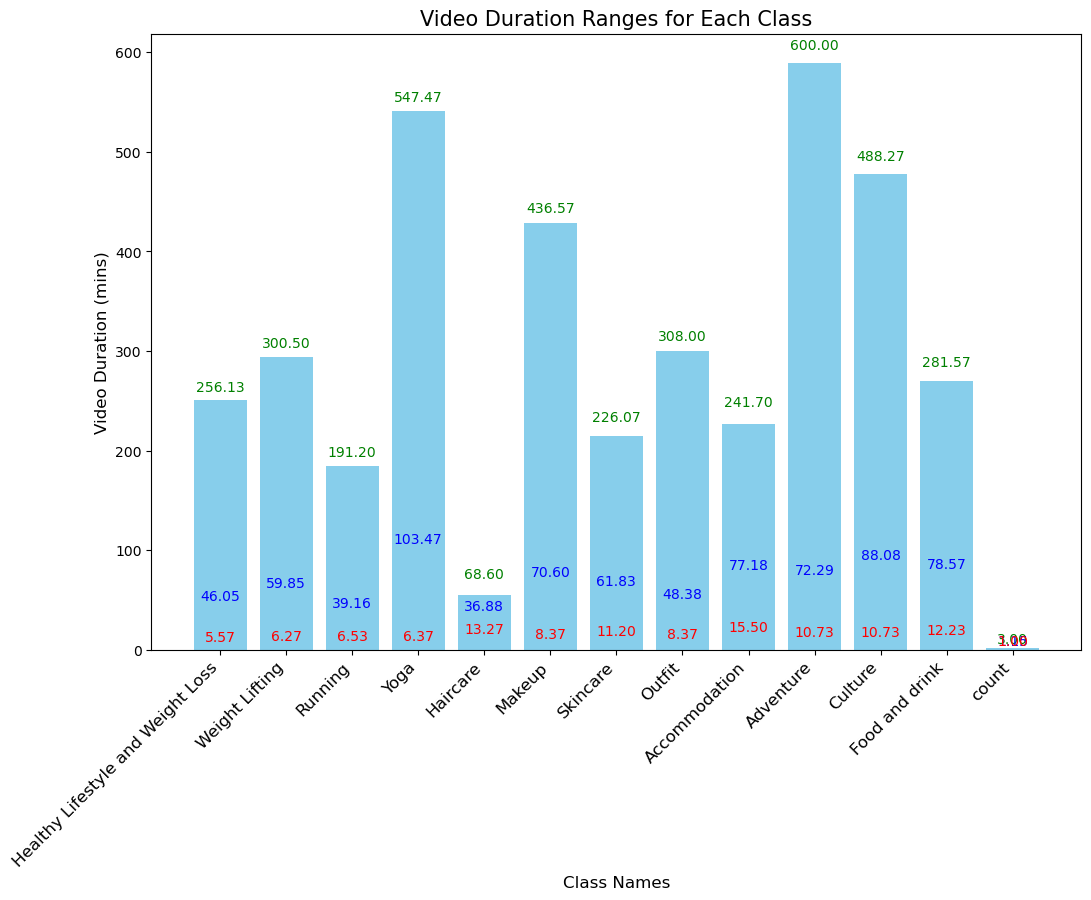

In [50]:
# Calculate min, max, and mean for each column excluding values equal to 0
stats_df = pd.DataFrame({
    'Min': product_df[product_df != 0].min(),
    'Max': product_df[product_df != 0].max(),
    'Mean': product_df[product_df != 0].mean()
})

plt.figure(figsize=(12, 8))

for column in stats_df.index:
    plt.bar(column, stats_df.loc[column, 'Max'] - stats_df.loc[column, 'Min'], label=column, color='skyblue')
    plt.text(column, stats_df.loc[column, 'Max'], f"{stats_df.loc[column, 'Max']:.2f}", ha='center', va='bottom', rotation=0, fontsize=10, color = 'green')
    plt.text(column, stats_df.loc[column, 'Mean'], f"{stats_df.loc[column, 'Mean']:.2f}", ha='center', va='bottom', rotation=0, fontsize=10, color = 'blue')
    plt.text(column, stats_df.loc[column, 'Min'], f"{stats_df.loc[column, 'Min']:.2f}", ha='center', va='bottom', rotation=0, fontsize=10, color = 'red')

# Configure plot labels and legend
plt.title("Video Duration Ranges for Each Class", fontsize = 15)
plt.xlabel("Class Names", fontsize=12)
plt.ylabel("Video Duration (mins)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

In [51]:
multi = pd.read_csv('data/data_set_label.csv')

In [52]:
multi

,No,filename,data_split,Links,main_label,sub_label,Healthy Lifestyle and Weight Loss,Weight Lifting,Running,Yoga,...,Accommodation,Adventure,Culture,Food and drink,duration,frame_count,height,width,fps,count
0,1,Travel_1.mp4,train,https://www.tiktok.com/@travelaholicgf/video/7...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,67.666667,2030,1024,576,30,1
1,2,Travel_2.mp4,test,https://www.tiktok.com/@usfirster/video/731055...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,67.933333,2038,1024,576,30,1
2,2,Travel_2.mp4,validation,https://www.tiktok.com/@usfirster/video/731055...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,67.933333,2038,1024,576,30,1
3,25,Travel_25.mp4,train,https://www.tiktok.com/@guliketravel/video/731...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,174.333333,5230,1024,576,30,1
4,26,Travel_26.mp4,validation,https://www.tiktok.com/@gungangjakpigud/video/...,Travel,Accommodation,0,0,0,0,...,1,0,0,0,118.800000,3564,1024,576,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,296,Sport_296.mp4,train,https://www.tiktok.com/@yoga.waadkian/video/72...,Sport and Fitness,Yoga,0,0,0,1,...,0,0,0,0,207.400000,6222,1024,576,30,1
873,297,Sport_297.mp4,train,https://www.tiktok.com/@yoga.waadkian/video/72...,Sport and Fitness,Yoga,0,0,0,1,...,0,0,0,0,87.966667,2639,1024,576,30,1
874,298,Sport_298.mp4,train,https://www.tiktok.com/@yoga.waadkian/video/72...,Sport and Fitness,Yoga,0,0,0,1,...,0,0,0,0,20.266667,608,1024,576,30,1
875,299,Sport_299.mp4,train,https://www.tiktok.com/@yoga.waadkian/video/72...,Sport and Fitness,Yoga,0,0,0,1,...,0,0,0,0,36.833333,1105,1024,576,30,1


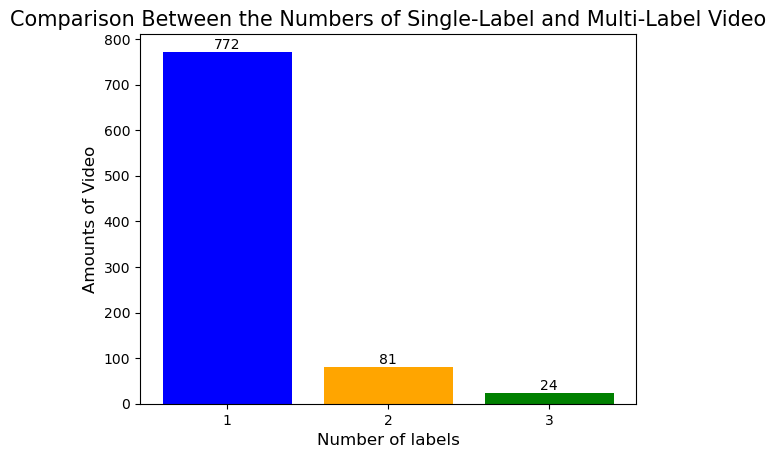

In [53]:
# Extract the 'count' column
count_column = multi['count']

# Count occurrences of 1, 2, and 3
count_1 = count_column[count_column == 1].count()
count_2 = count_column[count_column == 2].count()
count_3 = count_column[count_column == 3].count()

# Plot a bar chart
counts = [count_1, count_2, count_3]
labels = ['1', '2', '3']

plt.bar(labels, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Number of labels', fontsize=12)
plt.ylabel('Amounts of Video',fontsize=12)
plt.title('Comparison Between the Numbers of Single-Label and Multi-Label Video', fontsize = 15)

for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
    
plt.show()